# Regresi UTS - AdaBoost Regressor
## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## Importing the dataset and display the first few rows

In [2]:
# Menghubungkan Google Colab dengan Google Drive
from google.colab import drive

# Mount Google Drive ke Colab
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/RegresiUTSTelkom.csv'
df = pd.read_csv(file_path)
print(df.head())

Mounted at /content/drive
   2001  49.94357  21.47114   73.0775   8.74861  -17.40628  -13.09905  \
0  2001  48.73215  18.42930  70.32679  12.94636  -10.32437  -24.83777   
1  2001  50.95714  31.85602  55.81851  13.41693   -6.57898  -18.54940   
2  2001  48.24750  -1.89837  36.29772   2.58776    0.97170  -26.21683   
3  2001  50.97020  42.20998  67.09964   8.46791  -15.85279  -16.81409   
4  2001  50.54767   0.31568  92.35066  22.38696  -25.51870  -19.04928   

   -25.01202  -12.23257   7.83089  ...   13.0162  -54.40548  58.99367  \
0    8.76630   -0.92019  18.76548  ...   5.66812  -19.68073  33.04964   
1   -3.27872   -2.35035  16.07017  ...   3.03800   26.05866 -50.92779   
2    5.05097  -10.34124   3.55005  ...  34.57337 -171.70734 -16.96705   
3  -12.48207   -9.37636  12.63699  ...   9.92661  -55.95724  64.92712   
4   20.67345   -5.19943   3.63566  ...   6.59753  -50.69577  26.02574   

   15.37344   1.11144  -23.08793   68.40795  -1.82223  -27.46348   2.26327  
0  42.87836  -9.903

## Exploring the dataset and select target

In [3]:
print(df.shape)
print(df.info())
X = df.drop("2001", axis=1)  # Features
y = df["2001"]   # Target

(515344, 91)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515344 entries, 0 to 515343
Data columns (total 91 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   2001        515344 non-null  int64  
 1   49.94357    515344 non-null  float64
 2   21.47114    515344 non-null  float64
 3   73.0775     515344 non-null  float64
 4   8.74861     515344 non-null  float64
 5   -17.40628   515344 non-null  float64
 6   -13.09905   515344 non-null  float64
 7   -25.01202   515344 non-null  float64
 8   -12.23257   515344 non-null  float64
 9   7.83089     515344 non-null  float64
 10  -2.46783    515344 non-null  float64
 11  3.32136     515344 non-null  float64
 12  -2.31521    515344 non-null  float64
 13  10.20556    515344 non-null  float64
 14  611.10913   515344 non-null  float64
 15  951.0896    515344 non-null  float64
 16  698.11428   515344 non-null  float64
 17  408.98485   515344 non-null  float64
 18  383.70912   515344 non-null  fl

## Splitting the dataset into the Training set and Test set (70:30)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

## Feature selection

In [5]:
# Remove quasi-constant features
!pip install feature-engine
from feature_engine.selection import DropConstantFeatures, DropDuplicateFeatures
constant_filter = DropConstantFeatures(tol=0.1)
X_train = constant_filter.fit_transform(X_train)
X_test = constant_filter.transform(X_test)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.6/378.6 kB 5.1 MB/s eta 0:00:00


In [6]:
# Remove duplicate features
duplicate_filter = DropDuplicateFeatures()
X_train = duplicate_filter.fit_transform(X_train)
X_test = duplicate_filter.transform(X_test)

In [7]:
# Remove highly correlated features
def correlation_filter(X, threshold=0.95):
    corr_matrix = X.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > threshold)]
    return X.drop(columns=to_drop), to_drop

X_train, dropped_corr = correlation_filter(X_train)
X_test = X_test.drop(columns=dropped_corr)

## Create the pipeline and Predict the Test set results



In [9]:
model_pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', AdaBoostRegressor())  # AdaBoost Regressor
])
model_pipeline.fit(X_train, y_train)
y_pred = model_pipeline.predict(X_test)

## Visualize the actual and predicted value

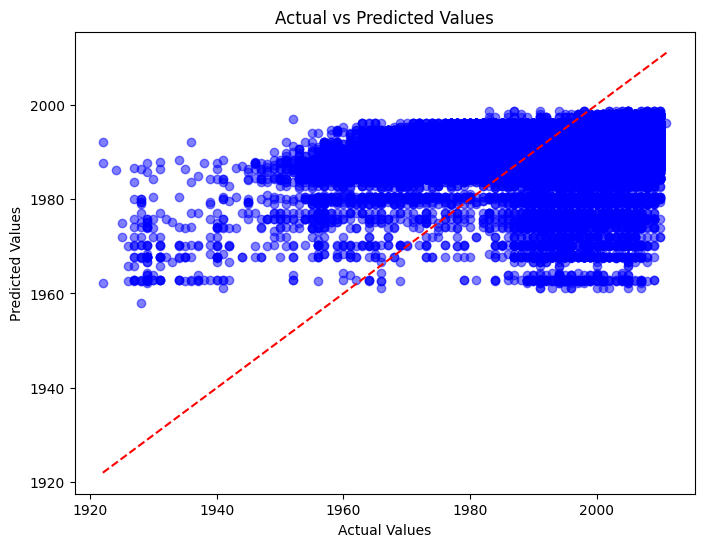

In [10]:
# Scatter plot of predicted vs actual values
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

## Visualize the residual

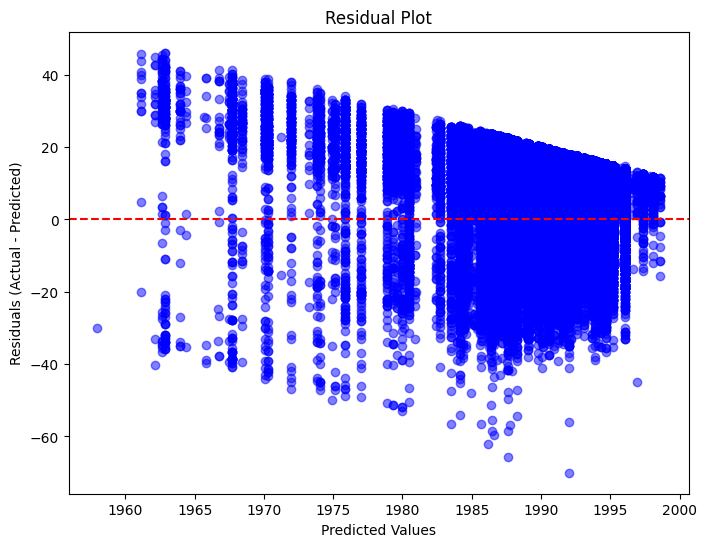

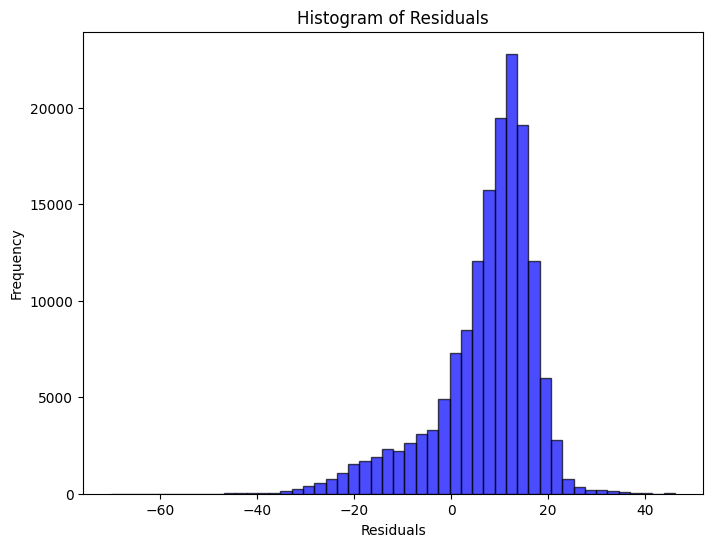

In [11]:
# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals (Actual - Predicted)')
plt.title('Residual Plot')
plt.show()

# Histogram of residuals
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=50, color='blue', edgecolor='black', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

## Evaluate the result

In [12]:
rmse = root_mean_squared_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Linear Regression")
print(f"RMSE: {rmse:.4f}")
print(f"MSE: {mse:.4f}")
print(f"RSquared: {r2:.4f}")

Linear Regression
RMSE: 12.6427
MSE: 159.8391
RSquared: -0.3381
